# 2.3.9 신경망(딥러닝)

다층 퍼셉트론(multilayer perceptrons, MLP)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

In [8]:
from preamble import *
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42
)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

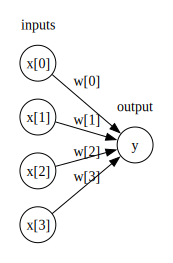

In [2]:
mglearn.plots.plot_logistic_regression_graph()

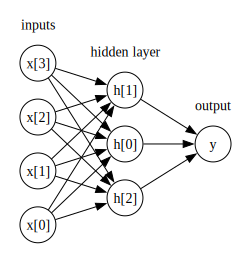

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

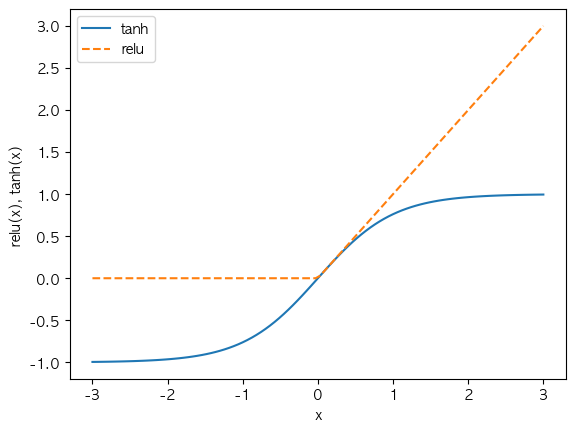

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

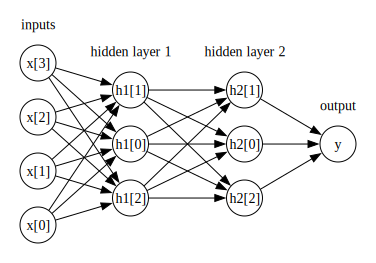

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, '특성 1')

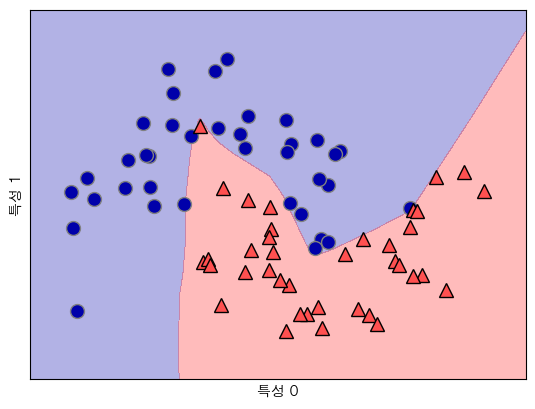

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

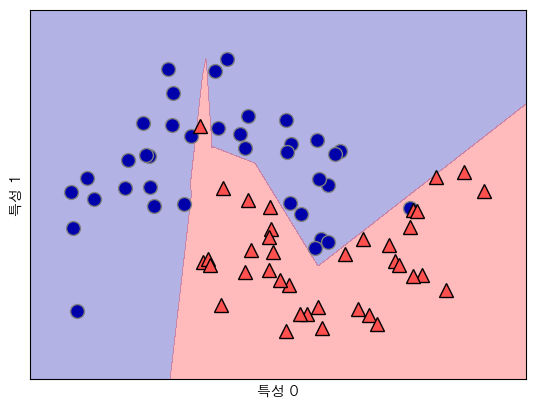

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10],
                    max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

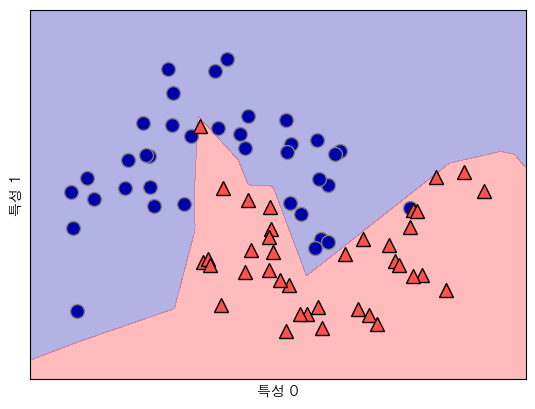

In [12]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

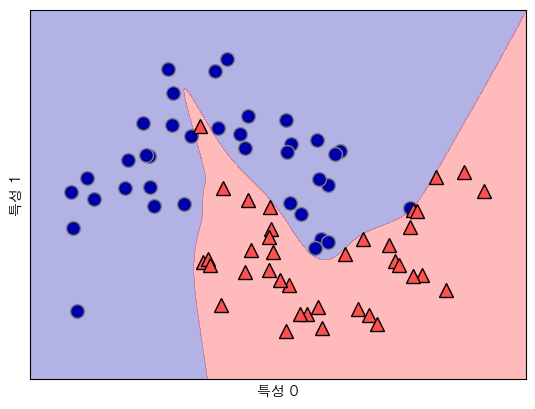

In [14]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

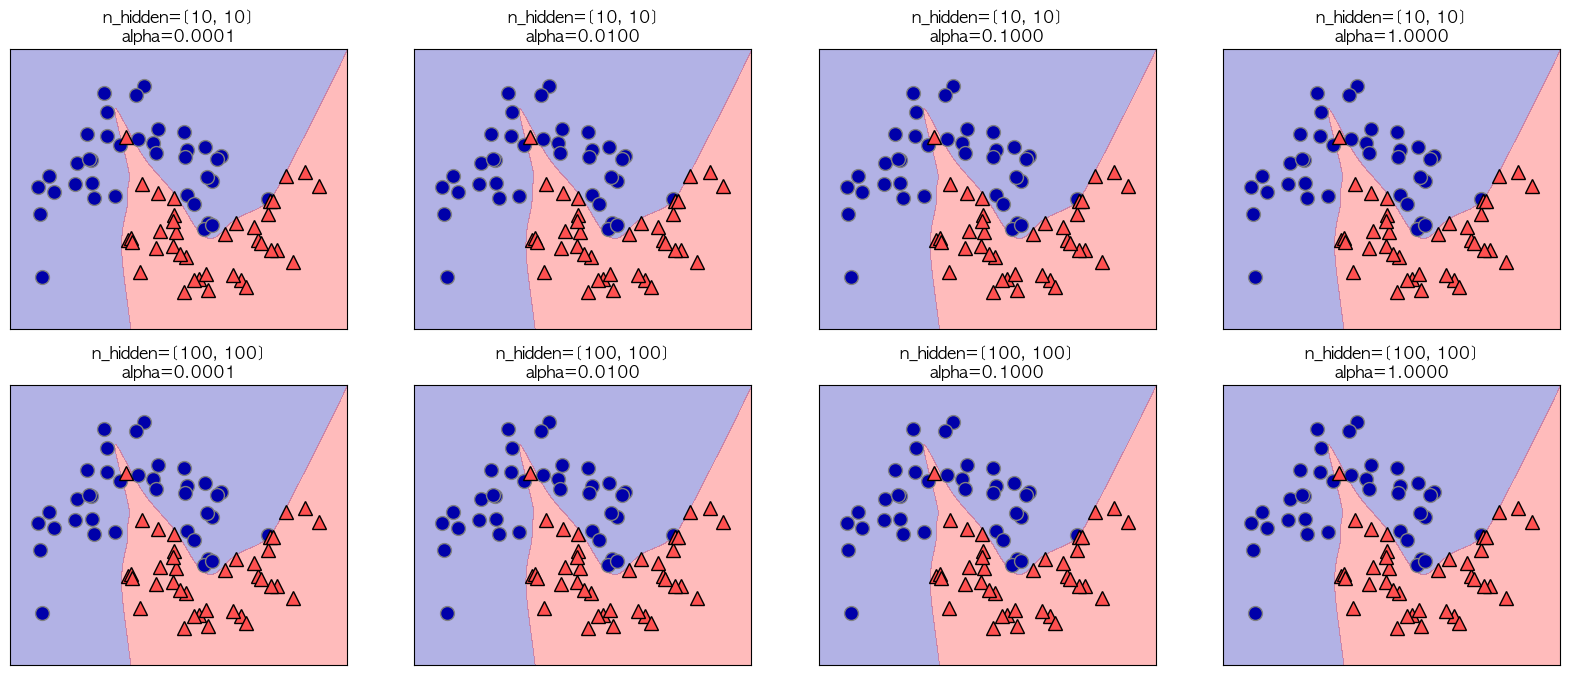

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp == MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha
        ))

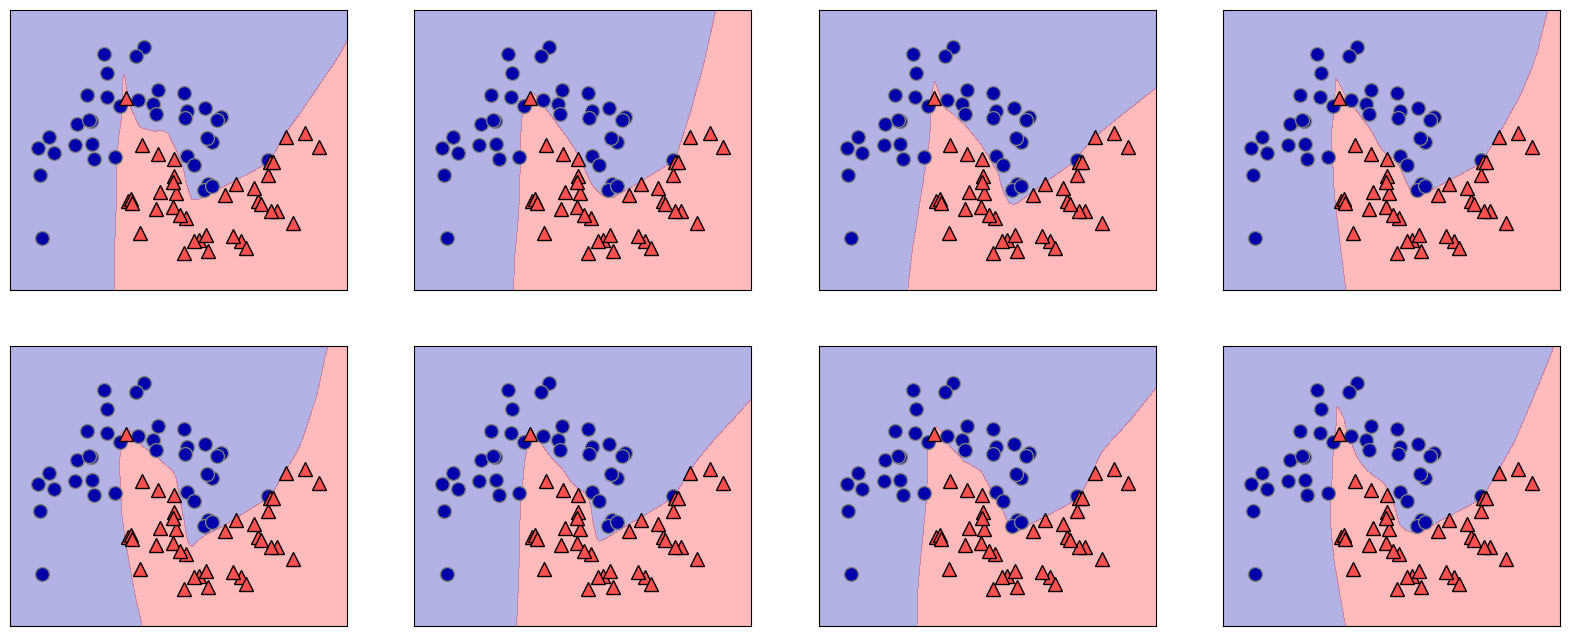

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)